<a href="https://colab.research.google.com/github/guptavasu1213/glaucoma-identification/blob/master/OD_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# import the necessary packages
from imutils import contours
from skimage import measure
import numpy as np
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def cropONH(imageName):
	starting_threshold = 200
	while True:
		data_set = {"n":"Training", "V":"Validation", "T":"Testing"}
		
		folderName= data_set[imageName[0]]

		img_path = "drive/Shared drives/Capstone Summer 2020/Data/"+ folderName +"/Images/"+ imageName +".jpg"

		# load the image, convert it to grayscale, and blur it
		image = cv2.imread(img_path)

		image=cv2.resize(image,(800,615))
		gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
		blur = cv2.bilateralFilter(gray,9,75,75)
		median=cv2.medianBlur(gray,5)

		# cv2_imshow(median)

		# threshold the image to reveal light regions in the
		# blurred image
		thresh = cv2.threshold(median, starting_threshold, 255, cv2.THRESH_BINARY)[1]
		# cv2_imshow(thresh)

		# perform a series of erosions and dilations to remove
		# any small blobs of noise from the thresholded image
		thresh = cv2.erode(thresh, None, iterations=2)
		thresh = cv2.dilate(thresh, None, iterations=4)

		# cv2_imshow(thresh)

		# perform a connected component analysis on the thresholded
		# image, then initialize a mask to store only the "large"
		# components
		labels = measure.label(thresh, neighbors=8, background=0)
		mask = np.zeros(thresh.shape, dtype="uint8")

		# loop over the unique components
		for label in np.unique(labels):
			# if this is the background label, ignore it
			if label == 0:
				continue

			# otherwise, construct the label mask and count the
			# number of pixels 
			labelMask = np.zeros(thresh.shape, dtype="uint8")
			labelMask[labels == label] = 255
			numPixels = cv2.countNonZero(labelMask)

			# if the number of pixels in the component is sufficiently
			# large, then add it to our mask of "large blobs"
			if numPixels > 100:
				mask = cv2.add(mask, labelMask)

		cv2_imshow(mask)


		# find the contours in the mask, then sort them from left to
		# right
		cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,
			cv2.CHAIN_APPROX_SIMPLE)
		
		cnts = imutils.grab_contours(cnts)
		if cnts == []:
			starting_threshold -= 10
			print("Decreasing threshold by 10. Now:", starting_threshold)
			continue
		# print(cnts)
		cnts = contours.sort_contours(cnts)[0]
		# loop over the contours
		for (i, c) in enumerate(cnts):
			ellipse = cv2.fitEllipse(c)
			(x, y, w, h) = cv2.boundingRect(c)
			cv2.putText(image, "#{}".format(i + 1), (x, y - 15),
						cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
			cv2.ellipse(image,ellipse,(0,255,0),2)
			var = 80
			cv2.rectangle(image, (x-var,y-var), (x+w+var,y+h+var), (255,0,0), 3)
			# print(h)
			# print(w)
			# print(x)
			# print(y)
			break			
		cv2_imshow(image)
		break

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=8, use connectivity=2


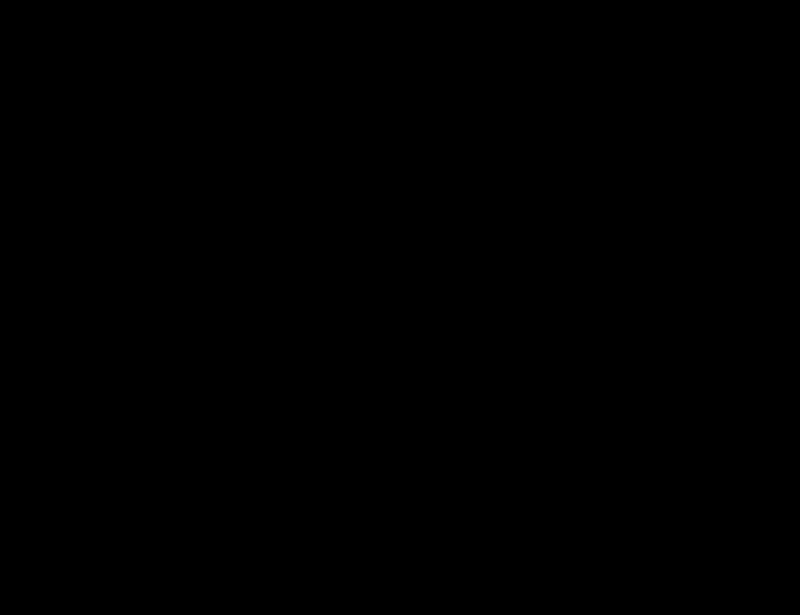

Decreasing threshold by 10. Now: 190


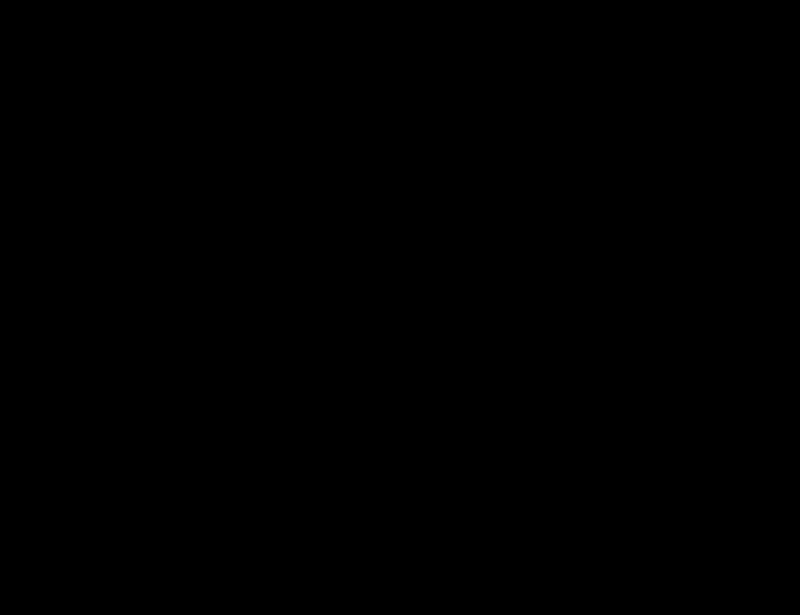

Decreasing threshold by 10. Now: 180


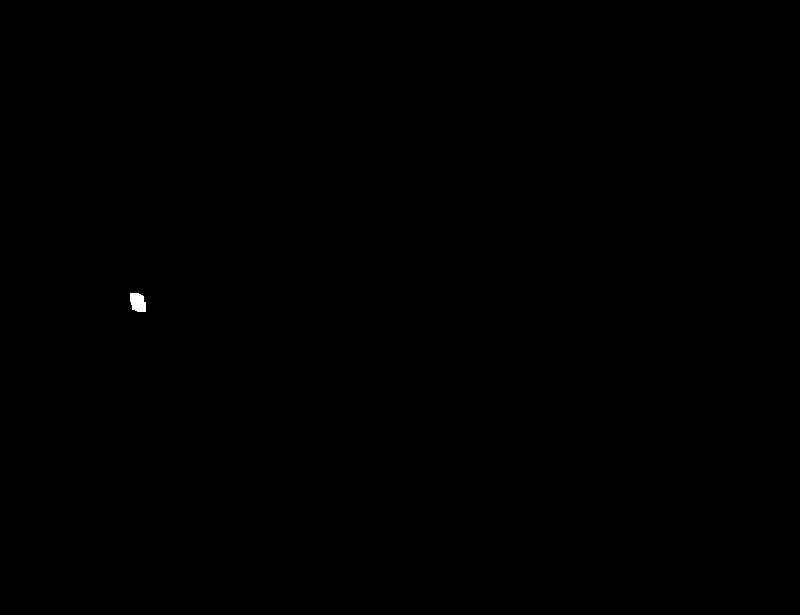

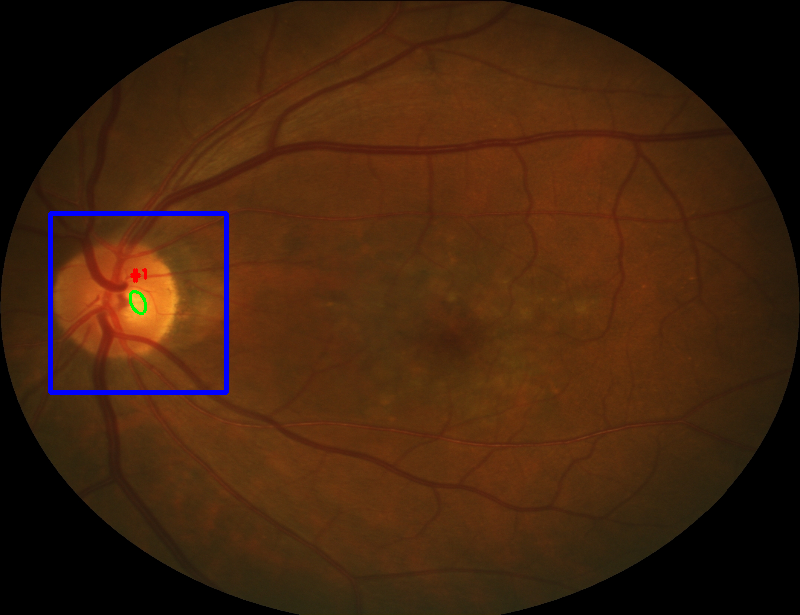

In [ ]:
cropONH("n0001")